In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
from IPython import display 

from sklearn.model_selection import train_test_split
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesClassifier

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.2 MB/s 


In [ ]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler


In [ ]:
!git clone https://github.com/nghi-huynh/BigDataChallenge2022.git

Cloning into 'BigDataChallenge2022'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 131 (delta 42), reused 105 (delta 19), pack-reused 0
Receiving objects: 100% (131/131), 9.86 MiB | 13.84 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
!mv /content/BigDataChallenge2022/processed_data .
!rm -r /content/BigDataChallenge2022

# EDA

In [ ]:
df = pd.read_csv('/content/processed_data/final_processed_data.csv')

We will analyze our dataset based on **yearly predictions**.

In [ ]:
df

,Entity,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income group,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,Afghanistan,2000,17.939269,0.442532,0.090314,1.683090e+10,489.923884,47.922003,9.861581,10.806,Low income,530.0,1.893882,7.7
1,Afghanistan,2001,17.933525,0.457531,0.084862,1.683090e+10,489.923884,47.922003,9.861581,10.809,Low income,530.0,1.963984,7.9
2,Afghanistan,2002,17.916547,0.461904,0.081991,4.055180e+09,179.426579,15.803164,9.443390,11.257,Low income,530.0,2.090646,7.9
3,Afghanistan,2003,17.889702,0.490590,0.081942,4.515559e+09,190.683814,17.035744,8.941258,11.141,Low income,530.0,2.240707,7.7
4,Afghanistan,2004,17.859903,0.514944,0.082468,5.226779e+09,211.382074,20.412764,9.808474,10.988,Low income,530.0,2.360176,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,Zimbabwe,2015,11.156429,1.676438,1.413464,1.996312e+10,1445.069702,107.686999,7.452066,4.778,Lower middle income,1280.0,2.193166,30.7
3256,Zimbabwe,2016,11.164133,1.747906,1.445058,2.054868e+10,1464.588957,112.411404,7.675163,4.788,Lower middle income,1290.0,2.279813,28.7
3257,Zimbabwe,2017,11.170427,1.804474,1.470020,1.758489e+10,1235.189032,115.646201,7.469752,4.785,Lower middle income,1390.0,2.364265,25.9
3258,Zimbabwe,2018,11.158765,1.870430,1.378207,1.811554e+10,1254.642265,141.369308,8.680062,4.796,Lower middle income,1410.0,2.472949,23.9


Here is the evolution of a few features over time:

In [ ]:
df.columns

Index(['Entity', 'Year',
       'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
       'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
       'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
       'health expenditure (% GDP)', 'unemployment rate', 'Income group',
       'Income',
       'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
       'Suicide rate'],
      dtype='object')

In [ ]:
year = pd.DataFrame(df['Year'])[0:20]

In [ ]:
plot_cols = ['Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)', 'health expenditure (per capita)','unemployment rate']

df_sub = df[plot_cols].loc[df['Entity']=='Canada']

In [ ]:
df_sub

,Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),health expenditure (per capita),unemployment rate
540,2.030059,2007.880859,6.83
541,2.014213,2063.927490,7.22
542,1.981742,2159.315918,7.66
543,1.964556,2562.914551,7.57
544,1.926634,2925.067139,7.19
545,1.917180,3296.501465,6.76
546,1.896588,3788.090088,6.32
547,1.888389,4212.990723,6.04
548,1.885977,4474.974609,6.14
549,1.904711,4371.552734,8.34


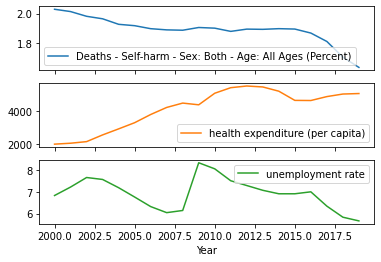

In [ ]:
plot_features = df_sub
plot_features.index = df['Year'].loc[df['Entity']=='Canada']
_ = plot_features.plot(subplots=True)


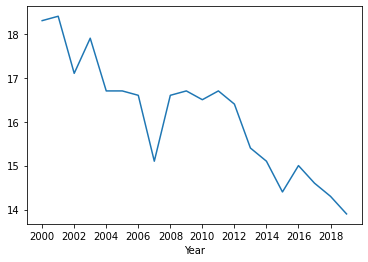

In [ ]:
plot_features = df['Suicide rate'].loc[df['Entity']=='Belgium']
plot_features.index = df['Year'].loc[df['Entity']=='Belgium']
plt.xticks(np.arange(2000,2020,2))
_ = plot_features.plot(subplots=True)

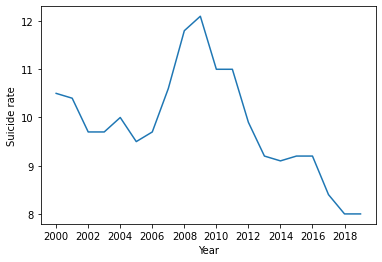

In [ ]:
plot_features = df['Suicide rate'].loc[df['Entity']=='Chile']
plot_features.index = df['Year'].loc[df['Entity']=='Chile']
plt.ylabel('Suicide rate')
plt.xticks(np.arange(2000,2020,2))
_ = plot_features.plot(subplots=True)

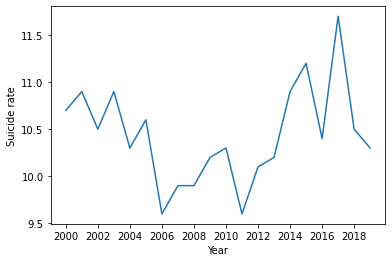

In [ ]:
plot_features = df['Suicide rate'].loc[df['Entity']=='Canada']
plot_features.index = df['Year'].loc[df['Entity']=='Canada']
plt.ylabel('Suicide rate')
plt.xticks(np.arange(2000,2020,2))
_ = plot_features.plot(subplots=True)

([<matplotlib.axis.XTick at 0x7f6a69b59050>,
 <a list of 10 Text major ticklabel objects>)

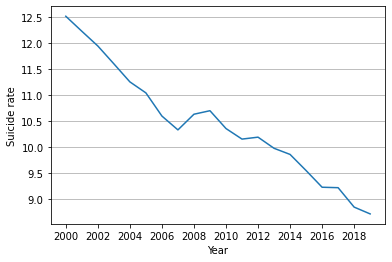

In [ ]:
sns.lineplot(y=df.loc[df['Income group']=='High income']['Suicide rate'],x=df.loc[df['Income group']=='High income']['Year'],ci=None,dashes=False).grid(axis='y')
#sns.lineplot(x=pred['Year'],y=pred['Suicide rate predicted'],ci=None)
#plt.legend(['Actual','Predicted'])
#plt.title('Actual vs Predicted Suicide Rate for High income group', fontsize=12, fontweight='bold')
plt.xticks(np.arange(2000,2020,2))

# Model Building and Training

Baseline models:

* k-Nearest Neighbors Regression (KNN Regression)
* Linear Regression
* Decision Tree Regression
* Random Forest
* XGBoost
* Bagging Regression
* Custom Ensemble: SuperLearner

Neural Networks:
* CNN
* RNN

**Metrics:**

* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R2 score (accuracy)

In [ ]:
#importing required libraries 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []
mae_train = []
mae_test = []
mse_train = []
mse_test = []
#mape_train = []
#mape_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g,h):
  ML_Model.append(model)
  acc_train.append(round(a, 5))
  acc_test.append(round(b, 5))
  mse_train.append(round(c, 5))
  mse_test.append(round(d, 5))
  rmse_train.append(round(e,5))
  rmse_test.append(round(f,5))
  mae_train.append(round(g,5))
  mae_test.append(round(h,5))
  #mape_train.append(round(i,5))
  #mape_test.append(round(j,5))


In [ ]:
cols = [
        'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
        'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
        'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)',
        'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
        'health expenditure (% GDP)', 'unemployment rate',
        'Income',
        'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
        'Suicide rate'
        ]

In [ ]:
df_train = df.loc[df['Income group']=='Low income'].drop(['Income group','Entity'],axis=1).copy()

In [ ]:
df_train

,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,2000,17.939269,0.442532,0.090314,1.683090e+10,489.923884,47.922003,9.861581,10.806,530.0,1.893882,7.7
1,2001,17.933525,0.457531,0.084862,1.683090e+10,489.923884,47.922003,9.861581,10.809,530.0,1.963984,7.9
2,2002,17.916547,0.461904,0.081991,4.055180e+09,179.426579,15.803164,9.443390,11.257,530.0,2.090646,7.9
3,2003,17.889702,0.490590,0.081942,4.515559e+09,190.683814,17.035744,8.941258,11.141,530.0,2.240707,7.7
4,2004,17.859903,0.514944,0.082468,5.226779e+09,211.382074,20.412764,9.808474,10.988,530.0,2.360176,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...
3215,2015,15.838019,0.823169,0.108293,4.244510e+10,1601.830063,73.176743,4.252858,13.770,1200.0,4.752210,6.8
3216,2016,15.928825,0.806922,0.113830,3.131737e+10,1152.720966,62.396828,5.177634,13.433,1150.0,4.640163,7.0
3217,2017,16.072402,0.820759,0.119687,2.684013e+10,964.264810,62.396828,5.177634,13.297,1070.0,4.677782,6.9
3218,2018,16.220943,0.797014,0.081976,2.160614e+10,758.145242,62.396828,5.177634,13.145,940.0,4.684685,7.1


In [ ]:
from sklearn.preprocessing import LabelEncoder

cols_encode = ['Year']

encoder = LabelEncoder()
for col in cols_encode:
    encoder.fit(df_train[col])
    df_train[col] = encoder.transform(df_train[col])

In [ ]:
#Scaling the numerical data columns with MinMaxScaler
numerical = [
            'gdp_current', 'gdp_per_capita', 'health expenditure (per capita)',
            'health expenditure (% GDP)',
            'Income',
            ]

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
df_train[numerical] = rc.fit_transform(df_train[numerical])

In [ ]:
cols_percent = ['Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)',
                'Suicide rate',
                'Deaths - Self-harm - Sex: Both - Age: All Ages (Percent)',
                'unemployment rate',
                'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)',
                'Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate)'
                ]

In [ ]:
df_train[cols_percent]=10**(-2)*df_train[cols_percent]

In [ ]:
df_train

,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Suicide rate
0,0,0.179393,0.004425,0.000903,1.037402,-0.033447,1.002984,1.827306,0.10806,0.099291,0.018939,0.077
1,1,0.179335,0.004575,0.000849,1.037402,-0.033447,1.002984,1.827306,0.10809,0.099291,0.019640,0.079
2,2,0.179165,0.004619,0.000820,-0.190783,-0.868087,-0.621854,1.658551,0.11257,0.099291,0.020906,0.079
3,3,0.178897,0.004906,0.000819,-0.146524,-0.837827,-0.559500,1.455923,0.11141,0.099291,0.022407,0.077
4,4,0.178599,0.005149,0.000825,-0.078152,-0.782188,-0.388662,1.805876,0.10988,0.099291,0.023602,0.078
...,...,...,...,...,...,...,...,...,...,...,...,...
3215,15,0.158380,0.008232,0.001083,3.499805,2.955441,2.280578,-0.436017,0.13770,2.000000,0.047522,0.068
3216,16,0.159288,0.008069,0.001138,2.430048,1.748202,1.735241,-0.062836,0.13433,1.858156,0.046402,0.070
3217,17,0.160724,0.008208,0.001197,1.999632,1.241617,1.735241,-0.062836,0.13297,1.631206,0.046778,0.069
3218,18,0.162209,0.007970,0.000820,1.496466,0.687552,1.735241,-0.062836,0.13145,1.262411,0.046847,0.071


In [ ]:
X = df_train.drop(['Suicide rate'], axis=1)
y = df_train['Suicide rate']

In [ ]:
X

,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent),Deaths - Self-harm - Sex: Both - Age: All Ages (Percent),Deaths - Mental and substance use disorders - Sex: Both - Age: Age-standardized (Rate),gdp_current,gdp_per_capita,health expenditure (per capita),health expenditure (% GDP),unemployment rate,Income,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,0,0.179393,0.004425,0.000903,1.037402,-0.033447,1.002984,1.827306,0.10806,0.099291,0.018939
1,1,0.179335,0.004575,0.000849,1.037402,-0.033447,1.002984,1.827306,0.10809,0.099291,0.019640
2,2,0.179165,0.004619,0.000820,-0.190783,-0.868087,-0.621854,1.658551,0.11257,0.099291,0.020906
3,3,0.178897,0.004906,0.000819,-0.146524,-0.837827,-0.559500,1.455923,0.11141,0.099291,0.022407
4,4,0.178599,0.005149,0.000825,-0.078152,-0.782188,-0.388662,1.805876,0.10988,0.099291,0.023602
...,...,...,...,...,...,...,...,...,...,...,...
3215,15,0.158380,0.008232,0.001083,3.499805,2.955441,2.280578,-0.436017,0.13770,2.000000,0.047522
3216,16,0.159288,0.008069,0.001138,2.430048,1.748202,1.735241,-0.062836,0.13433,1.858156,0.046402
3217,17,0.160724,0.008208,0.001197,1.999632,1.241617,1.735241,-0.062836,0.13297,1.631206,0.046778
3218,18,0.162209,0.007970,0.000820,1.496466,0.687552,1.735241,-0.062836,0.13145,1.262411,0.046847


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((384, 11), (96, 11))

### KNN

In [ ]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 20)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [ ]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

**Performance Evaluation**

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

#computing mean squared error (MSE)
mse_train_knn = mean_squared_error(y_train, y_train_knn)
mse_test_knn = mean_squared_error(y_test, y_test_knn)

#computitn mean absolute error
mae_train_knn = mean_absolute_error(y_train, y_train_knn)
mae_test_knn = mean_absolute_error(y_test, y_test_knn)

#computitn mean absolute percentage error
mape_train_knn = mean_absolute_percentage_error(y_train, y_train_knn)
mape_test_knn = mean_absolute_percentage_error(y_test, y_test_knn)

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)
print('KNN: The MSE of the training set is:', mse_train_knn)
print('KNN: The MSE of the testing set is:', mse_test_knn)
print('KNN: The MAE of the training set is:', mae_train_knn)
print('KNN: The MAE of the testing set is:', mae_test_knn)
#print('KNN: The MAPE of the training set is:', mape_train_knn)
#print('KNN: The MAPE of the testing set is:', mape_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.326

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 0.0491196269487786
KNN: The MSE of the training set is: 0.0
KNN: The MSE of the testing set is: 0.0024127377515871765
KNN: The MAE of the training set is: 0.0
KNN: The MAE of the testing set is: 0.036596494975268165


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, mse_train_knn, mse_test_knn,rmse_train_knn, rmse_test_knn,mae_train_knn,mae_test_knn)

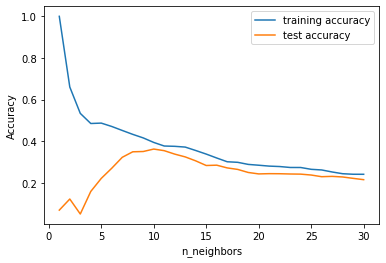

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 20
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

### Linear Regression

In [ ]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

#computing mean squared error (MSE)
mse_train_lr = mean_squared_error(y_train, y_train_lr)
mse_test_lr = mean_squared_error(y_test, y_test_lr)

#computitn mean absolute error
mae_train_lr = mean_absolute_error(y_train, y_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_lr)

#computitn mean absolute percentage error
mape_train_lr = mean_absolute_percentage_error(y_train, y_train_lr)
mape_test_lr = mean_absolute_percentage_error(y_test, y_test_lr)


print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)
print('Linear Regression: The MSE of the training set is:', mse_train_lr)
print('Linear Regression: The MSE of the testing set is:', mse_test_lr)
print('Linear Regression: The MAE of the training set is:', mae_train_lr)
print('Linear Regression: The MAE of the testing set is:', mae_test_lr)
#print('Linear Regression: The MAPE of the training set is:', mape_train_lr)
#print('Linear Regression: The MAPE of the testing set is:', mape_test_lr)

Linear Regression: Accuracy on training Data: 0.787
Linear Regression: Accuracy on test Data: 0.786

Linear Regression: The RMSE of the training set is: 0.02508968051070895
Linear Regression: The RMSE of the testing set is: 0.027707763716522886
Linear Regression: The MSE of the training set is: 0.0006294920681294485
Linear Regression: The MSE of the testing set is: 0.0007677201701706621
Linear Regression: The MAE of the training set is: 0.019045578498249095
Linear Regression: The MAE of the testing set is: 0.020781221049620716


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, mse_train_lr, mse_test_lr, rmse_train_lr, rmse_test_lr, mae_train_lr,mae_test_lr)

### Decision trees: Regression

In [ ]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

#computing mean squared error (MSE)
mse_train_tree = mean_squared_error(y_train, y_train_tree)
mse_test_tree = mean_squared_error(y_test, y_test_tree)

#computitn mean absolute error
mae_train_tree = mean_absolute_error(y_train, y_train_tree)
mae_test_tree = mean_absolute_error(y_test, y_test_tree)

#computitn mean absolute percentage error
#mape_train_tree = mean_absolute_percentage_error(y_train, y_train_tree)
#mape_test_tree = mean_absolute_percentage_error(y_test, y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)
print('\nDecision Tree: The MSE of the training set is:', mse_train_tree)
print('Decision Tree: The MSE of the testing set is:', mse_test_tree)
print('\nDecision Tree: The MAE of the training set is:', mae_train_tree)
print('Decision Tree: The MAE of the testing set is:', mae_test_tree)
#print('\nDecision Tree: The MAPE of the training set is:', mape_train_tree)
#print('Decision Tree: The MAPE of the testing set is:', mape_test_tree)

Decision Tree: Accuracy on training Data: 0.996
Decision Tree: Accuracy on test Data: 0.944

Decision Tree: The RMSE of the training set is: 0.0033906019625499096
Decision Tree: The RMSE of the testing set is: 0.014202962423676099

Decision Tree: The MSE of the training set is: 1.1496181668447299e-05
Decision Tree: The MSE of the testing set is: 0.00020172414160835525

Decision Tree: The MAE of the training set is: 0.0013814671728734228
Decision Tree: The MAE of the testing set is: 0.006919551917989417


In [ ]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree,mse_train_tree,mse_test_tree, rmse_train_tree, rmse_test_tree,mae_train_tree,mae_test_tree)

Text(0.5, 1.0, 'Feature Importance (Decision Tree Regressor)')

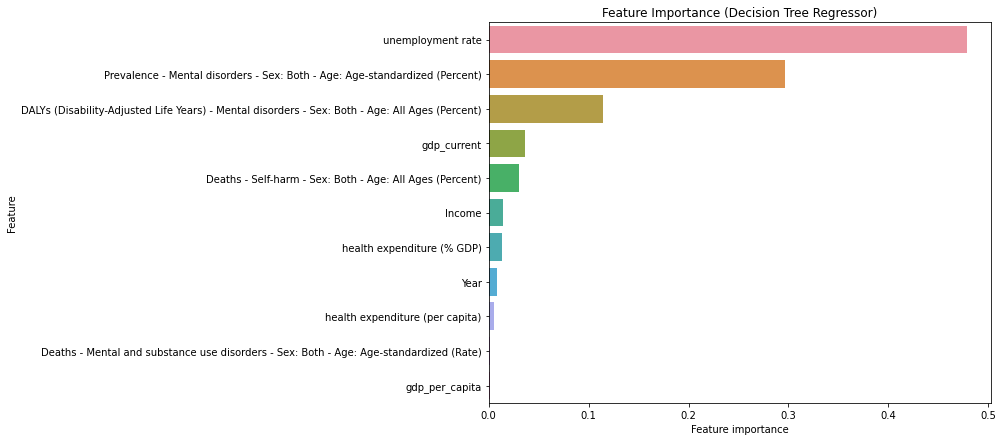

In [ ]:
# plotting features importance
plt.figure(figsize=(9,7))
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': tree.feature_importances_
}).sort_values(by='importance',ascending=False)

# Visualize the feature importance
sns.barplot(data=importance_df,x='importance',y='feature')
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Decision Tree Regressor)')

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1, 31)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

NameError: ignored

### XGBoost Regression

In [ ]:
from xgboost import XGBRegressor

# instantiate the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)
#fit the model
xgb.fit(X_train, y_train)

[03:47:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=4)

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)


In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(X_train, y_train)
acc_test_xgb = xgb.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

#computing mean squared error (MSE)
mse_train_xgb = mean_squared_error(y_train, y_train_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_xgb)

#computitn mean absolute error
mae_train_xgb = mean_absolute_error(y_train, y_train_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_xgb)

#computitn mean absolute percentage error
#mape_train_xgb = mean_absolute_percentage_error(y_train, y_train_xgb)
#mape_test_xgb = mean_absolute_percentage_error(y_test, y_test_xgb)

print("XGBoost Regression: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Regression: Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print('\nXGBoost Regression: The RMSE of the training set is: ', rmse_train_xgb)
print('XGBoost Regression: The RMSE of the testing set is: ', rmse_test_xgb)
print('\nXGBoost Regression: The MSE of the training set is: ', mse_train_xgb)
print('XGBoost Regression: The MSE of the testing set is: ', mse_test_xgb)
print('\nXGBoost Regression: The MAE of the training set is: ', mae_train_xgb)
print('XGBoost Regression: The MAE of the testing set is: ', mae_test_xgb)
#print('\nXGBoost Regression: The MAPE of the training set is: ', mape_train_xgb)
#print('XGBoost Regression: The MAPE of the testing set is: ', mape_test_xgb)

XGBoost Regression: Accuracy on training Data: 0.999
XGBoost Regression: Accuracy on test Data: 0.971

XGBoost Regression: The RMSE of the training set is:  0.0014083249013897624
XGBoost Regression: The RMSE of the testing set is:  0.010233696711596746

XGBoost Regression: The MSE of the training set is:  1.9833790278744838e-06
XGBoost Regression: The MSE of the testing set is:  0.00010472854838494606

XGBoost Regression: The MAE of the training set is:  0.0010674159228801728
XGBoost Regression: The MAE of the testing set is:  0.007524117541809878


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost Regression',acc_train_xgb, acc_test_xgb, mse_train_xgb, mse_test_xgb, rmse_train_xgb, rmse_test_xgb,mae_train_xgb, mae_test_xgb)

### Bagging Regression

In [ ]:
from sklearn.ensemble import BaggingRegressor

#instantiate the model
br = BaggingRegressor(n_estimators=1)

#fit the model
br.fit(X_train, y_train)

BaggingRegressor(n_estimators=1)

In [ ]:
#predicting the target value from the model for the samples
y_test_br = br.predict(X_test)
y_train_br = br.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_br = br.score(X_train, y_train)
acc_test_br = br.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_br = np.sqrt(mean_squared_error(y_train, y_train_br))
rmse_test_br = np.sqrt(mean_squared_error(y_test, y_test_br))

#computing mean squared error (MSE)
mse_train_br = mean_squared_error(y_train, y_train_br)
mse_test_br = mean_squared_error(y_test, y_test_br)

#computitn mean absolute error
mae_train_br = mean_absolute_error(y_train, y_train_br)
mae_test_br = mean_absolute_error(y_test, y_test_br)

#computitn mean absolute percentage error
#mape_train_br = mean_absolute_percentage_error(y_train, y_train_br)
#mape_test_br = mean_absolute_percentage_error(y_test, y_test_br)

print("Bagging Regression: Accuracy on training Data: {:.3f}".format(acc_train_br))
print("Bagging Regression: Accuracy on test Data: {:.3f}".format(acc_test_br))
print('\nBagging Regression: The RMSE of the training set is: ', rmse_train_br)
print('Bagging Regression: The RMSE of the testing set is: ', rmse_test_br)
print('\nBagging Regression: The MSE of the training set is: ', mse_train_br)
print('Bagging Regression: The MSE of the testing set is: ', mse_test_br)
print('\nBagging Regression: The MAE of the training set is: ', mae_train_br)
print('Bagging Regression: The MAE of the testing set is: ', mae_test_br)
#print('\nBagging Regression: The MAPE of the training set is: ', mape_train_br)
#print('Bagging Regression: The MAPE of the testing set is: ', mape_test_br)

Bagging Regression: Accuracy on training Data: 0.917
Bagging Regression: Accuracy on test Data: 0.855

Bagging Regression: The RMSE of the training set is:  0.01571109613192748
Bagging Regression: The RMSE of the testing set is:  0.022759384511302876

Bagging Regression: The MSE of the training set is:  0.0002468385416666666
Bagging Regression: The MSE of the testing set is:  0.0005179895833333333

Bagging Regression: The MAE of the training set is:  0.005072916666666667
Bagging Regression: The MAE of the testing set is:  0.012239583333333333


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Bagging Regression',acc_train_br, acc_test_br, mse_train_br, mse_test_br, rmse_train_br, rmse_test_br, mae_train_br,mae_test_br)

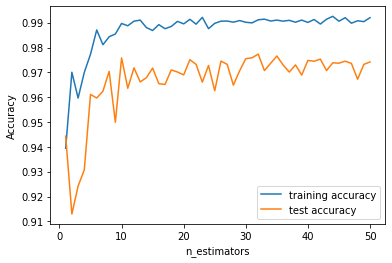

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 1 to 50
est = range(1, 51)
for n in est:
  # fit the model
  br = BaggingRegressor(n_estimators=n)
  br.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(br.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(br.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(est, training_accuracy, label="training accuracy")
plt.plot(est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

### Custom Ensemble

In [ ]:
### You will need mlens package
!pip install mlens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 227 kB 35.0 MB/s 


In [ ]:

from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer
from mlens.metrics.metrics import rmse

from sklearn.metrics import accuracy_score

[MLENS] backend: threading


In [ ]:
# --- Build ---
# Passing a scoring function will create cv scores during fitting 
#the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=rmse, random_state=555, verbose=2)

# Build the first layer
ensemble.add(xgb)
ensemble.add(knn_grid)
ensemble.add_meta(lr)

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...1056830>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function rmse at 0x7f9ab1056830>, shuffle=False, verbose=2)

In [ ]:
# Fit ensemble
ensemble.fit(X_train, y_train)


Fitting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:02
Processing layer-3             done | 00:00:00
Fit complete                        | 00:00:03


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...1056830>)],
   n_jobs=-1, name='group-3', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function rmse at 0x7f9ab1056830>, shuffle=False, verbose=2)

In [ ]:
#Predicting the target of samples from the model
y_train_en = ensemble.predict(X_train)
y_test_en = ensemble.predict(X_test)


Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:00

Predicting 3 layers
Processing layer-1             done | 00:00:00
Processing layer-2             done | 00:00:00
Processing layer-3             done | 00:00:00
Predict complete                    | 00:00:00


In [ ]:
#computing the accuracy of the model performance
acc_train_en = r2_score(y_train,y_train_en)
acc_test_en = r2_score(y_test,y_test_en)

#computing root mean squared error (RMSE)
rmse_train_en = rmse(y_train,y_train_en)
rmse_test_en = rmse(y_test,y_test_en)

#computing mean squared error (MSE)
mse_train_en = mean_squared_error(y_train, y_train_en)
mse_test_en = mean_squared_error(y_test, y_test_en)

#computitn mean absolute error
mae_train_en = mean_absolute_error(y_train, y_train_en)
mae_test_en = mean_absolute_error(y_test, y_test_en)

#computitn mean absolute percentage error
#mape_train_en = mean_absolute_percentage_error(y_train, y_train_en)
#mape_test_en = mean_absolute_percentage_error(y_test, y_test_en)


print("Custom Ensemble: Accuracy on training Data: {:.3f}".format(acc_train_en))
print("Custom Ensemble: Accuracy on test Data: {:.3f}".format(acc_test_en))
print('\nCustom Ensemble: The RMSE of the training set is: ', rmse_train_en)
print('Custom Ensemble: The RMSE of the testing set is: ', rmse_test_en)
print('\nCustom Ensemble: The MSE of the training set is: ', mse_train_en)
print('Custom Ensemble: The MSE of the testing set is: ', mse_test_en)
print('\nCustom Ensemble: The MAE of the training set is: ', mae_train_en)
print('Custom Ensemble: The MAE of the testing set is: ', mae_test_en)
#print('\nCustom Ensemble: The MAPE of the training set is: ', mape_train_en)
#print('Custom Ensemble: The MAPE of the testing set is: ', mape_test_en)

Custom Ensemble: Accuracy on training Data: 0.982
Custom Ensemble: Accuracy on test Data: 0.961

Custom Ensemble: The RMSE of the training set is:  0.007371696896261218
Custom Ensemble: The RMSE of the testing set is:  0.011874526920137149

Custom Ensemble: The MSE of the training set is:  5.4341915130347254e-05
Custom Ensemble: The MSE of the testing set is:  0.00014100438957706185

Custom Ensemble: The MAE of the training set is:  0.00490034557079586
Custom Ensemble: The MAE of the testing set is:  0.008724518011324109


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Ensemble_SuperLearner',acc_train_en, acc_test_en,mse_train_en,mse_test_en, rmse_train_en, rmse_test_en,mae_train_en, mae_test_en)

In [ ]:
pred = pd.DataFrame(y_test_en,columns=['Suicide rate predicted'])

In [ ]:

pred

,Suicide rate predicted
0,0.124907
1,0.229816
2,0.091891
3,0.104272
4,0.155942
...,...
91,0.275955
92,0.266793
93,0.124247
94,0.092717


In [ ]:
pred['Suicide rate'] = y_test.values.reshape(96)

In [ ]:
pred = 10**(2)*pred

In [ ]:
pred

,Suicide rate predicted,Suicide rate
0,12.490727,11.9
1,22.981552,25.3
2,9.189130,10.0
3,10.427228,10.7
4,15.594228,15.8
...,...,...
91,27.595531,28.0
92,26.679342,27.6
93,12.424695,11.7
94,9.271669,10.3


In [ ]:
pred['Year'] = X_test['Year'].values.reshape(96)

In [ ]:
pred

,Suicide rate predicted,Suicide rate,Year
0,12.490727,11.9,9
1,22.981552,25.3,10
2,9.189130,10.0,15
3,10.427228,10.7,13
4,15.594228,15.8,4
...,...,...,...
91,27.595531,28.0,4
92,26.679342,27.6,11
93,12.424695,11.7,7
94,9.271669,10.3,18


In [ ]:
pred = pred.sort_values(by='Year')

In [ ]:
pred

,Suicide rate predicted,Suicide rate,Year
49,25.631083,25.6,0
51,10.031037,8.8,0
35,8.619603,11.1,0
81,20.398052,17.3,0
82,8.883732,7.7,0
...,...,...,...
37,21.892023,23.1,17
8,15.379624,14.8,18
94,9.271669,10.3,18
34,9.965005,9.6,19


In [ ]:
pred['Year']

49     0
51     0
35     0
81     0
82     0
      ..
37    17
8     18
94    18
34    19
84    19
Name: Year, Length: 96, dtype: int64

In [ ]:
X_test['Year'].unique()

array([ 9, 10, 15, 13,  4,  6, 14,  1, 18,  0, 12,  5, 17,  8,  7, 19, 16,
       11,  3,  2])

In [ ]:
y_predicted_axis = []
for i in range(20):
  y_predicted_axis.append(pred['Suicide rate predicted'].loc[pred['Year']==i].median())

In [ ]:
y_predicted_axis = np.array(y_predicted_axis)

In [ ]:
y_predicted_axis

array([20.15868568, 15.13613129, 19.38281059, 11.17834187, 16.0729599 ,
       15.86660957,  9.30055809, 11.56627941, 12.21834469, 12.49072742,
       12.51136017, 16.56407356, 13.06025219, 10.42722797, 12.35866356,
       12.21834469,  8.97452545, 13.91866684, 12.32564735, 11.34754944])

In [ ]:
y_actual_axis = []
for i in range(20):
  y_actual_axis.append(pred['Suicide rate'].loc[pred['Year']==i].median())

In [ ]:
y_actual_axis = np.array(y_actual_axis)

In [ ]:
y_actual_axis

array([17.3 , 16.1 , 16.9 , 11.5 , 16.8 , 16.1 ,  9.4 , 11.7 , 11.7 ,
       12.1 , 13.05, 17.  , 13.05, 10.7 , 12.8 , 12.6 , 10.2 , 13.25,
       12.55, 12.  ])

In [ ]:
x = np.array(list(pred['Year'].unique()))

In [ ]:
x = np.arange(2000,2020)
x

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

([<matplotlib.axis.XTick at 0x7f9ad894d350>,
 <a list of 10 Text major ticklabel objects>)

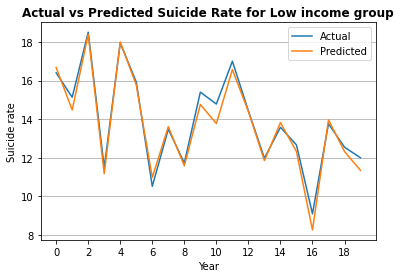

In [ ]:

sns.lineplot(x=pred['Year'],y=pred['Suicide rate'],ci=None,dashes=False).grid(axis='y')
sns.lineplot(x=pred['Year'],y=pred['Suicide rate predicted'],ci=None)
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted Suicide Rate for Low income group', fontsize=12, fontweight='bold')
plt.xticks(np.arange(0,20,2))


([<matplotlib.axis.XTick at 0x7f9ad89f78d0>,
 <a list of 10 Text major ticklabel objects>)

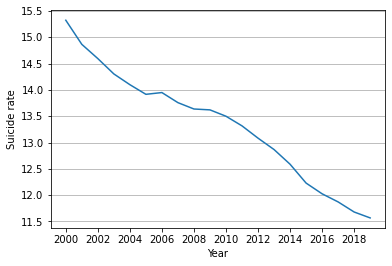

In [ ]:
sns.lineplot(y=df.loc[df['Income group']=='Low income']['Suicide rate'],x=df.loc[df['Income group']=='Low income']['Year'],ci=None,dashes=False).grid(axis='y')
#sns.lineplot(x=pred['Year'],y=pred['Suicide rate predicted'],ci=None)
#plt.legend(['Actual','Predicted'])
#plt.title('Actual vs Predicted Suicide Rate for High income group', fontsize=12, fontweight='bold')
plt.xticks(np.arange(2000,2020,2))

# Comparision of Models

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train MSE':mse_train,
    'Test MSE': mse_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test,
    'Train MAE': mae_train,
    'Test MAE': mae_test,
    })

In [ ]:
results

,ML Model,Train Accuracy,Test Accuracy,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE
0,k-Nearest Neighbors Regression,1.00000,0.92667,0.00000,0.00027,0.00000,0.01649,0.00000,0.00809
1,Linear Regression,0.86022,0.84154,0.00053,0.00059,0.02294,0.02424,0.01773,0.01862
2,Decision Tree,0.99248,0.93068,0.00003,0.00026,0.00532,0.01603,0.00307,0.00986
3,XGBoost Regression,0.99704,0.96114,0.00001,0.00014,0.00334,0.01200,0.00247,0.00774
4,Bagging Regression,0.92774,0.82400,0.00027,0.00065,0.01649,0.02555,0.00409,0.01116
5,Ensemble_SuperLearner,0.97824,0.94713,0.00008,0.00020,0.00905,0.01400,0.00619,0.00968
